In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
# function to extract can frames from a candump file
def extract_can(candump_file):
    list_can = []
    with open(candump_file) as f:
        list_lines = list(f)
        for line in list_lines:
            list_can.append(line.split(' ')[2][:-1])
    return list_can


# get IDs of interest in the list of can frames
def filter_can(list_can, can_interest):
    dict_of_can = {}
    for can_ in can_interest:
        dict_of_can[can_] = []
    for each_can in list_can:
        if each_can[:3] in dict_of_can.keys():
            dict_of_can[each_can[:3]].append(each_can[4:])
    return dict_of_can


# analyze list of can by difference between bytes
def analyze_can(can_id, dict_of_can):
    diff_vector = []
    for k in range(1, len(dict_of_can[can_id])):
        diff = 0
        for j in range(8):
            diff += abs(int(dict_of_can[can_id][k - 1][2*j:2*j + 1], 16) - int(dict_of_can[can_id][k][2*j:2*j + 1], 16))
        diff_vector.append(diff)
    return diff_vector

In [62]:
can_interest = ['415','3CA',]
list_can_extracted = extract_can('./candump_files/car_50km.log')
dict_can = filter_can(list_can_extracted, can_interest)

In [63]:
diffv = analyze_can(can_interest[0], dict_can)

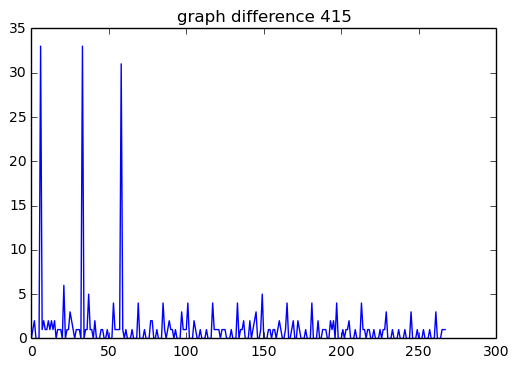

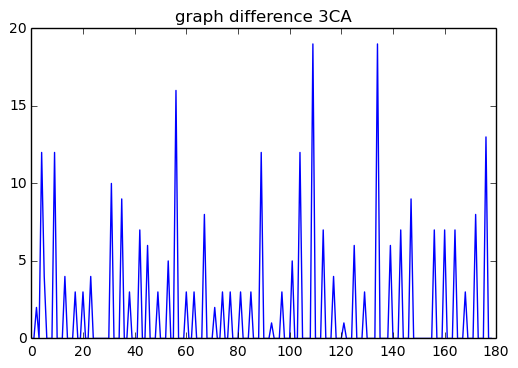

In [67]:
for c_id in can_interest:
    diffv = analyze_can(c_id, dict_can)
    plt.figure()
    plt.title('graph difference ' + c_id)
    plt.plot(diffv)